## Problem definition

The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.

We aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Our goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.


## Objective

The primary objective is to establish a linear equation that predicts 'usr' based on the given system measures. This involves:

    Understanding the Data: Analyzing the various system measures provided in the dataset to understand their impact on 'usr'.

    Handling Missing Data: Ensuring that missing values are properly handled to maintain data integrity.

    Feature Selection: Identifying the most relevant system measures that significantly influence 'usr'.

    Model Building: Developing a linear regression model to predict 'usr' using the selected features.

    Model Evaluation: Evaluating the performance of the model using appropriate metrics to ensure its accuracy and reliability.

    Model Interpretation: Interpreting the model coefficients to understand the impact of each feature on 'usr'.

By achieving these objectives, the goal is to provide a robust predictive model that helps in understanding and managing CPU utilization in user mode based on various system activities.

Data Description :

System measures used:

* lread - Reads (transfers per second ) between system memory and user memory
* lwrite - writes (transfers per second) between system memory and user memory
* scall - Number of system calls of all types per second
* sread - Number of system read calls per second .
* swrite - Number of system write calls per second .
* fork - Number of system fork calls per second.
* exec - Number of system exec calls per second.
* rchar - Number of characters transferred per second by system read calls
* wchar - Number of characters transfreed per second by system write calls
* pgout - Number of page out requests per second
* ppgout - Number of pages, paged out per second
* pgfree - Number of pages per second placed on the free list.
* pgscan - Number of pages checked if they can be freed per second
* atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
* pgin - Number of page-in requests per second
* ppgin - Number of pages paged in per second
* pflt - Number of page faults caused by protection errors (copy-on-writes).
* vflt - Number of page faults caused by address translation .
* runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
freemem - Number of memory pages available to user processes
* freeswap - Number of disk blocks available for page swapping.
------------------------
usr - Portion of time (%) that cpus run in user mode

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [2]:
df=pd.read_excel("C:/Users/AKHIL MOHANDAS/Documents/Study_Material/Project 5/compactiv.xlsx")

### EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

#### there are missing values

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lread,8192.0,NaN,NaN,NaN,19.559692,53.353799,0.0,2.0,7.0,20.0,1845.0
lwrite,8192.0,NaN,NaN,NaN,13.106201,29.891726,0.0,0.0,1.0,10.0,575.0
scall,8192.0,NaN,NaN,NaN,2306.318237,1633.617322,109.0,1012.0,2051.5,3317.25,12493.0
sread,8192.0,NaN,NaN,NaN,210.47998,198.980146,6.0,86.0,166.0,279.0,5318.0
swrite,8192.0,NaN,NaN,NaN,150.058228,160.47898,7.0,63.0,117.0,185.0,5456.0
fork,8192.0,NaN,NaN,NaN,1.884554,2.479493,0.0,0.4,0.8,2.2,20.12
exec,8192.0,NaN,NaN,NaN,2.791998,5.212456,0.0,0.2,1.2,2.8,59.56
rchar,8088.0,NaN,NaN,NaN,197385.728363,239837.493526,278.0,34091.5,125473.5,267828.75,2526649.0
wchar,8177.0,NaN,NaN,NaN,95902.992785,140841.707911,1498.0,22916.0,46619.0,106101.0,1801623.0
pgout,8192.0,NaN,NaN,NaN,2.285317,5.307038,0.0,0.0,0.0,2.4,81.44


### unique values for categorical variables

In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

RUNQSZ :  2
runqsz
CPU_Bound        3861
Not_CPU_Bound    4331
Name: count, dtype: int64




### Missing Values

In [7]:
# Are there any missing values ?
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

##### Imputing missing values

In [8]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [9]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.000000,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.000000,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,197385.728363,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,197385.728363,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,197385.728363,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.00,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.00,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.00,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.00,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.00,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.40,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.20,1.2,2.800,59.56
rchar,8192.0,1.973857e+05,238310.037735,278.0,34860.50,127825.0,265394.750,2526649.00
wchar,8192.0,9.590299e+04,140712.688639,1498.0,22977.75,46653.0,106037.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.00,0.0,2.400,81.44


### Checking for duplicates

In [11]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


## Univariate analysis

### Numerical variables:

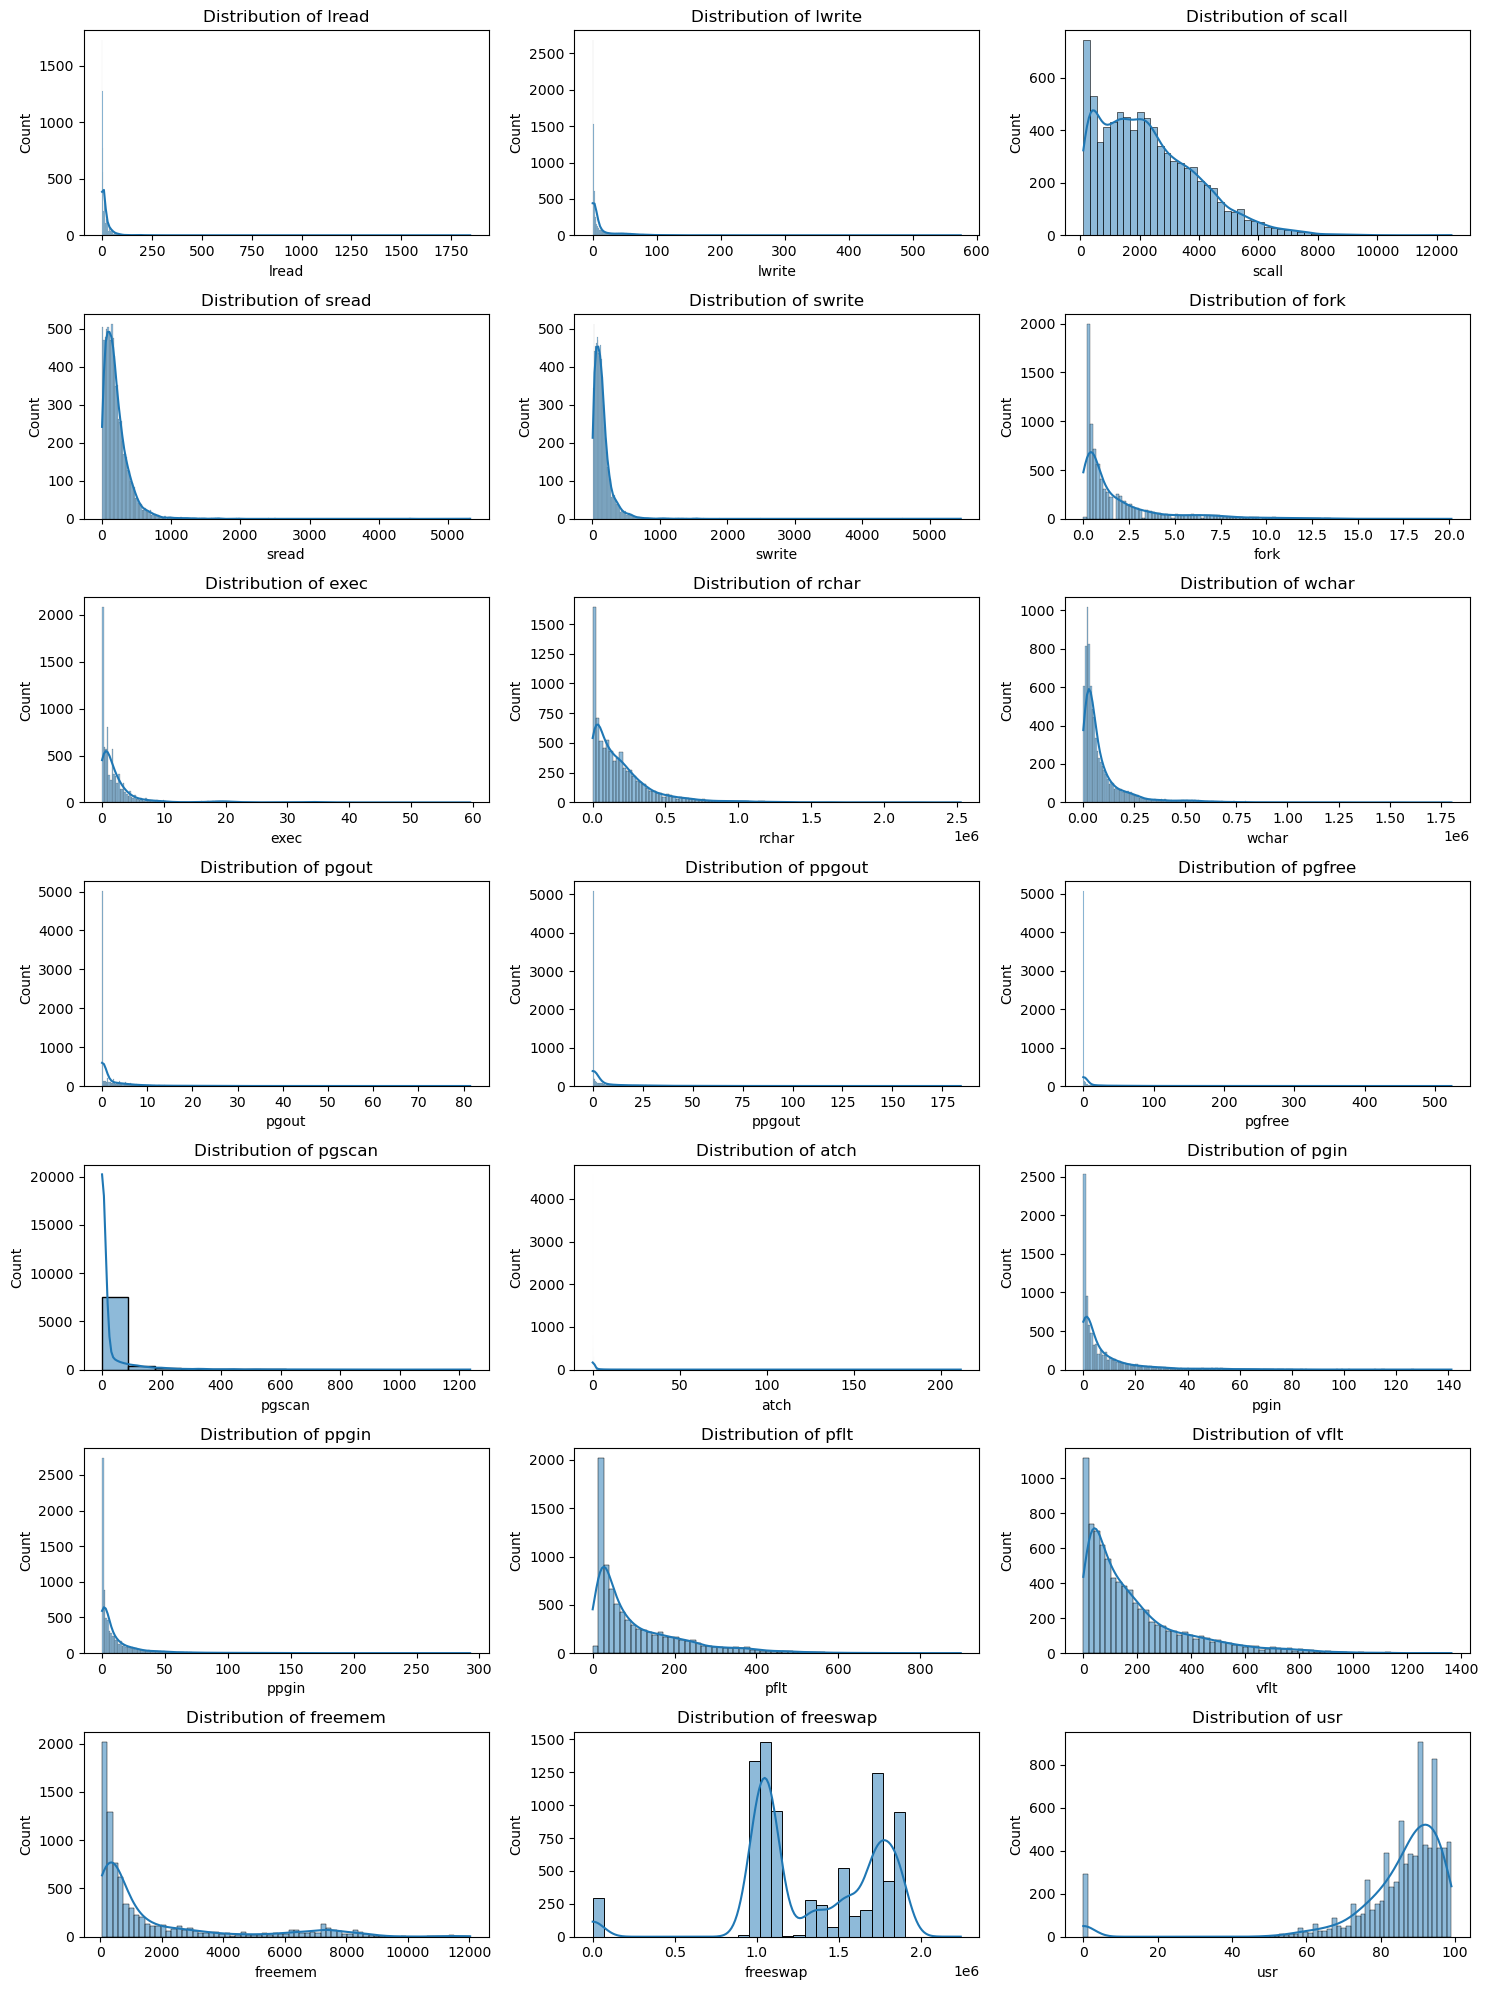

In [12]:
numerical_columns = df.select_dtypes(include=['number']).columns

#histograms
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

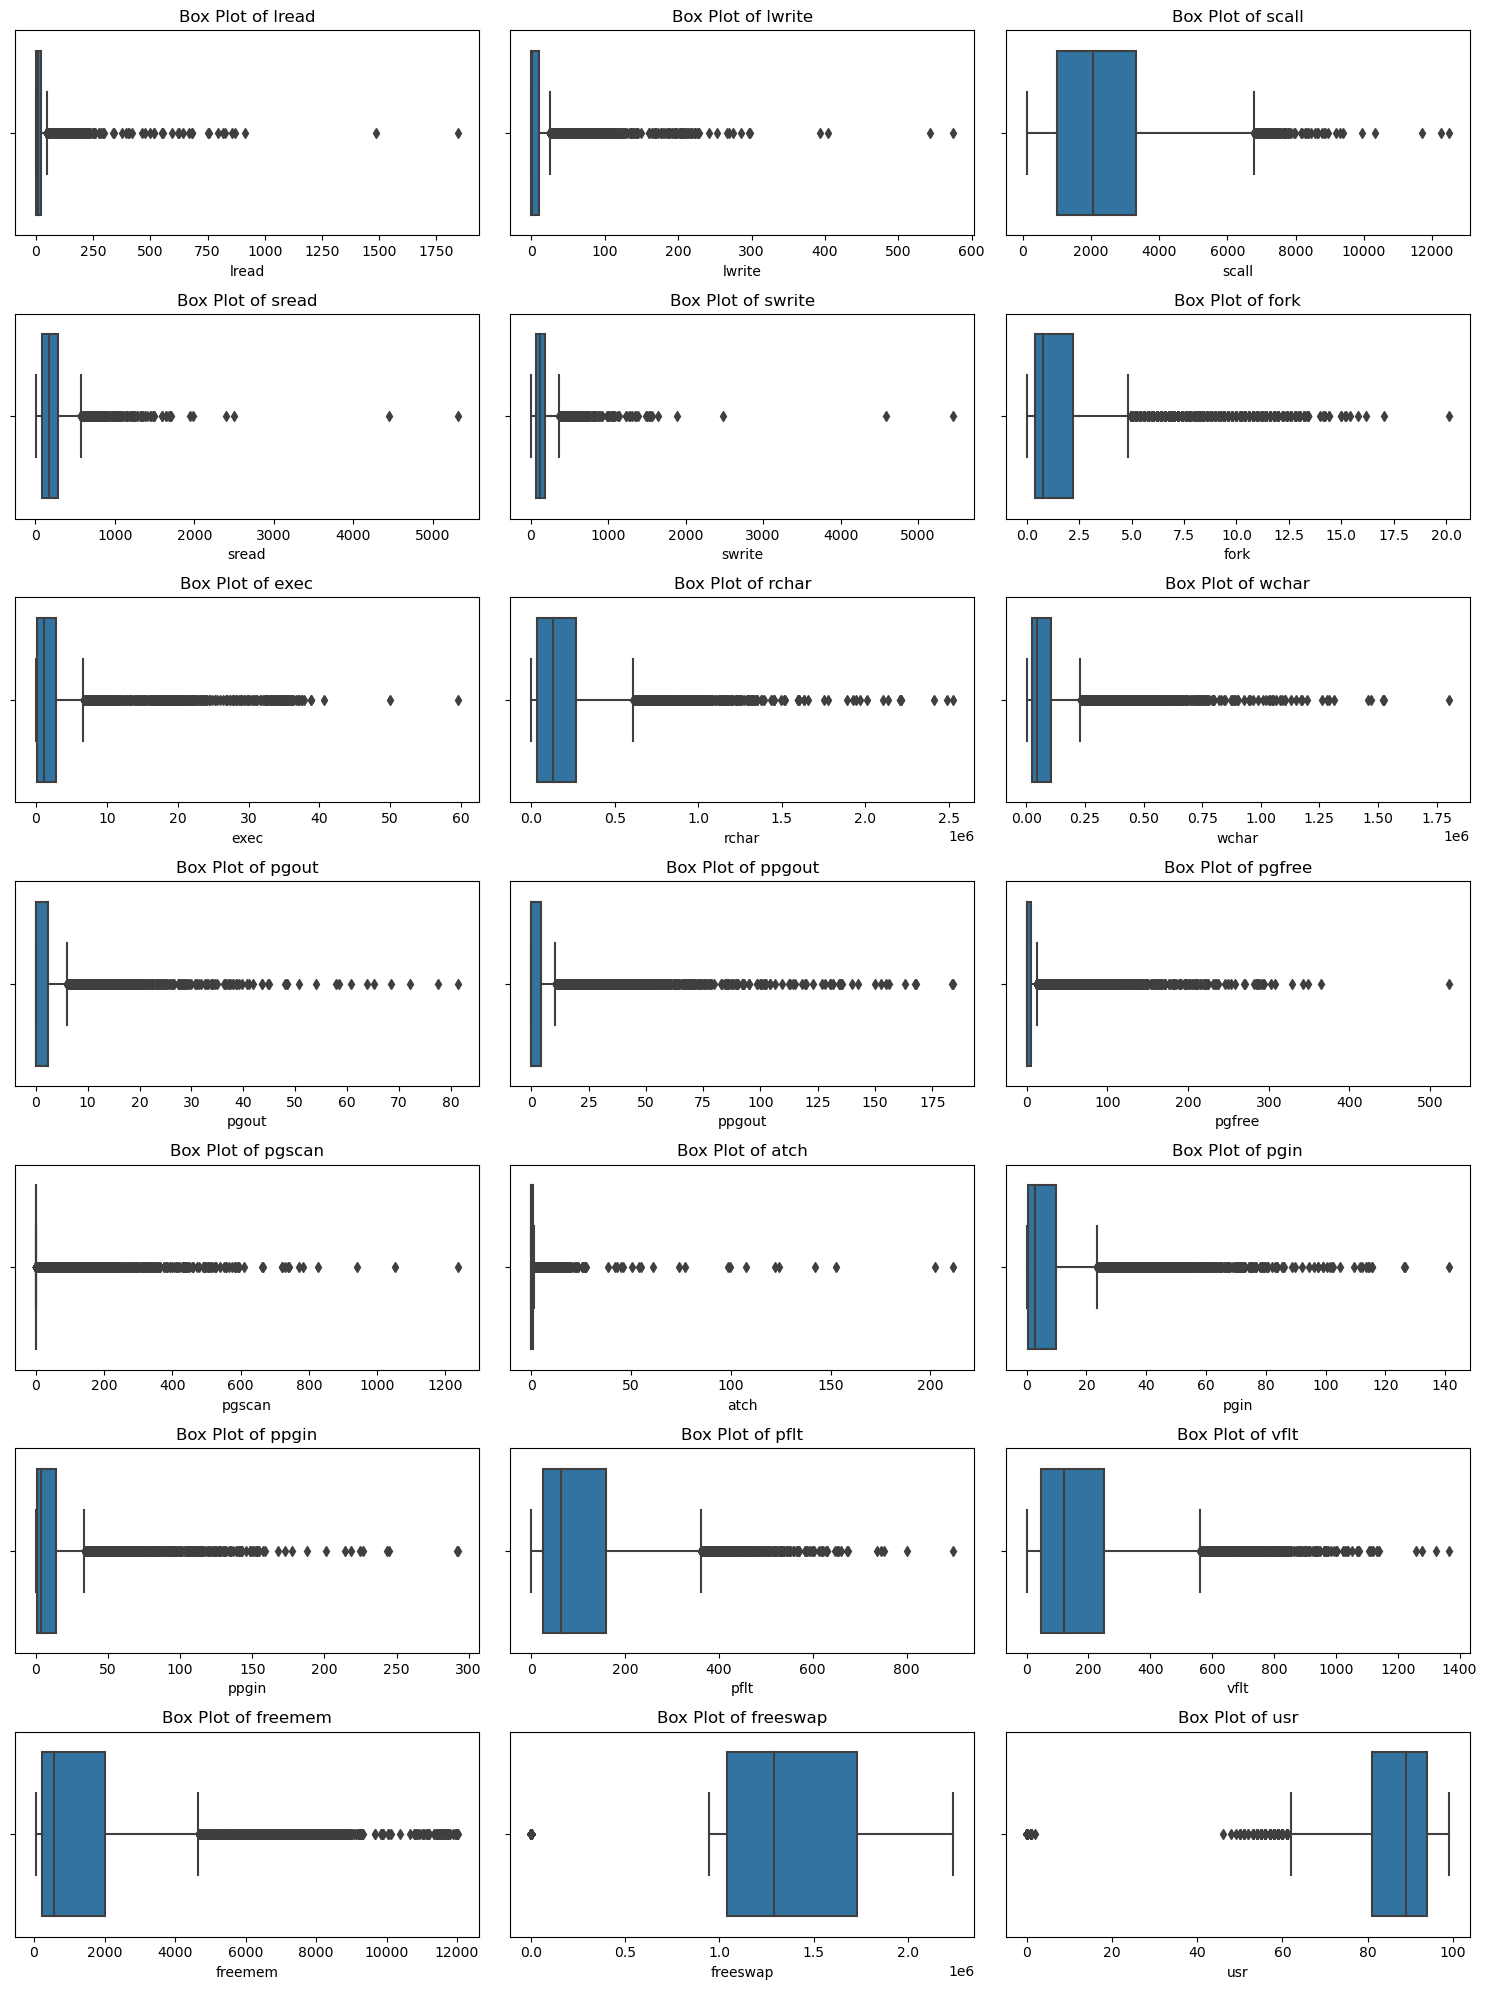

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Create box plots
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [14]:
summary_stats = df[numerical_columns].describe()
print(summary_stats)

             lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.192000e+03  8.192000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317  ...   
std       2.479493     5.212456  2.383100e+05  1.407127e+05     5.307038  ...   


###### except for freeswap and usr, other numerical variables have a right skewed distribution.

#### Observations:

    1)Variables like rchar, wchar, scall, sread, and swrite have very high maximum values, suggesting occasional spikes in activity.
    
    2)freemem and freeswap show that memory availability and disk blocks for swapping can vary widely, affecting system performance.

## Multi-variate analysis

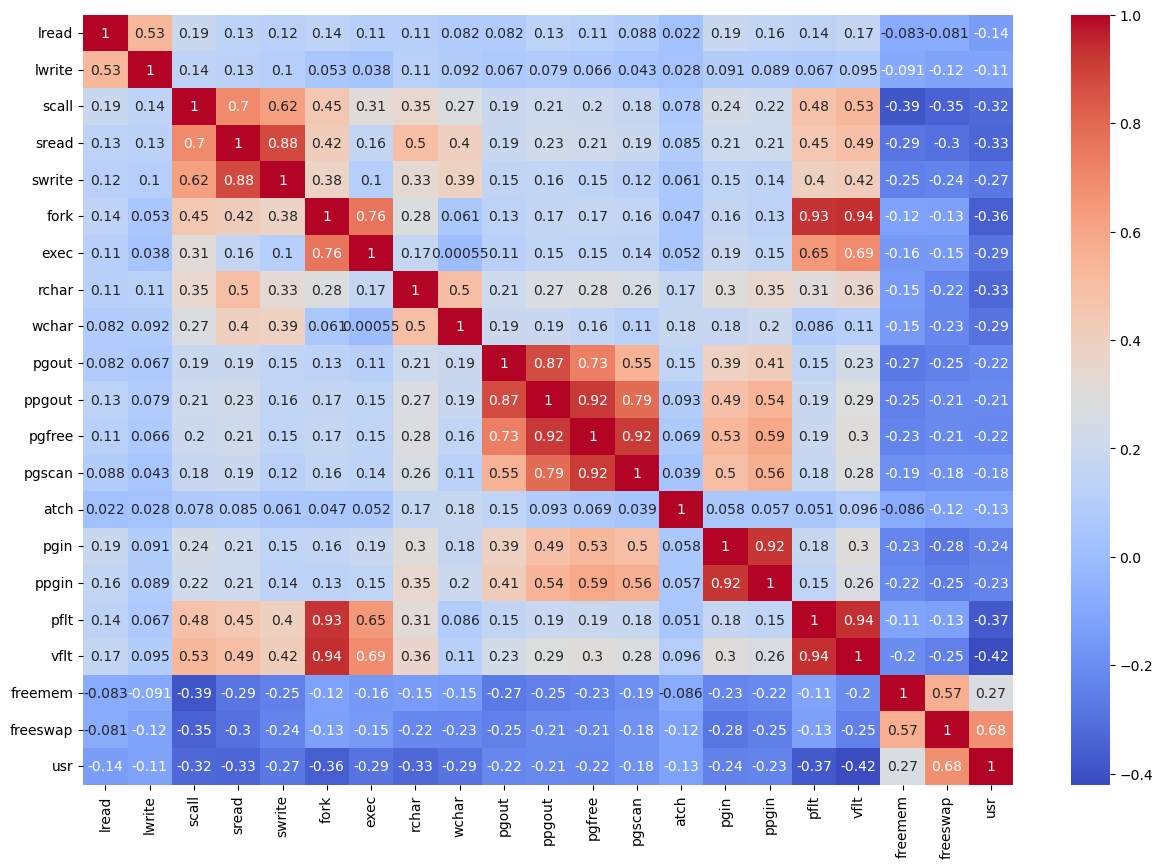

In [15]:
# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

High Positive Correlations:

    sread and swrite: 0.881
    
    fork and exec: 0.764
    
    pflt and vflt: 0.935
    
    pgfree and ppgout: 0.918
    
    pgfree and pgscan: 0.915
    
    pgout and ppgout: 0.872
    
    pgout and pgfree: 0.730
    
    pgin and ppgin: 0.924
    
    usr and freeswap: 0.679
    
High Negative Correlations:

    usr with sread,swrite,fork,rchar,wchar,pgout,ppgout,pflt,vflt.
    
    freemem with scall,sread,swrite,pgin,ppgin,pflt,vflt,freeswap.

### Data Pre-processing

#### Outlier Detection:

In [16]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.000000,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.000000,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,197385.728363,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,197385.728363,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,197385.728363,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [17]:
df = pd.get_dummies(df, columns=['runqsz'],dtype='uint8',drop_first=True)

In [18]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.000000,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.000000,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,197385.728363,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,197385.728363,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,197385.728363,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,1


### Correlation Plot

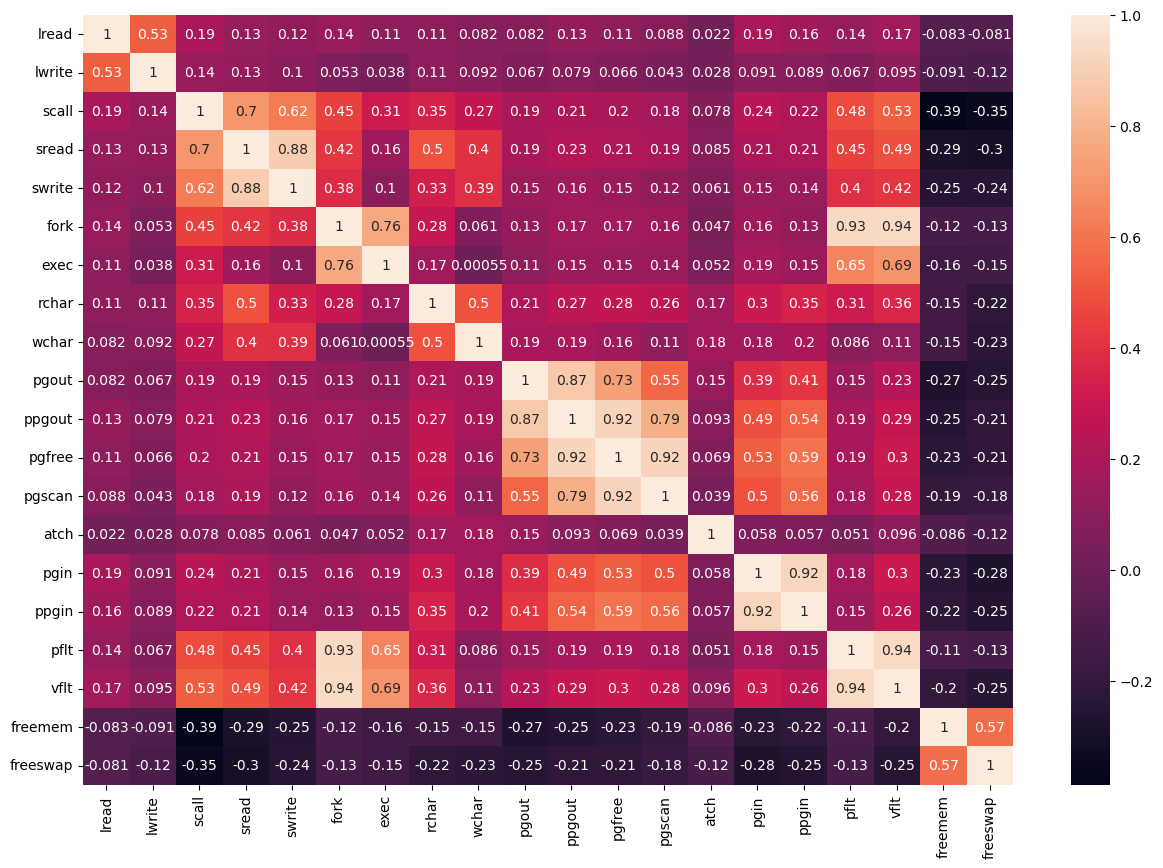

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.iloc[:, 0:20].corr(),annot=True)
plt.show()

High Positive Correlations:

    fork and exec: 0.764
        
    sread and swrite: 0.881
        
    pgout and ppgout: 0.872
        
    pgfree and ppgout: 0.918
        
    pgfree and pgscan: 0.915
        
    pgin and ppgin: 0.924
        
    pflt and vflt: 0.935
        
    freemem and freeswap: 0.573
        
High Negative Correlations:

    freemem and scall: -0.388
        
    freemem and sread: -0.286
        
    freemem and swrite: -0.249
        
    freemem and pgout: -0.270
        
    freemem and ppgout: -0.248
        
    freemem and pgfree: -0.234
        
    freemem and pgscan: -0.194
        
    freemem and atch: -0.086

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   int64  
 1   lwrite                8192 non-null   int64  
 2   scall                 8192 non-null   int64  
 3   sread                 8192 non-null   int64  
 4   swrite                8192 non-null   int64  
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgout                 8192 non-null   float64
 10  ppgout                8192 non-null   float64
 11  pgfree                8192 non-null   float64
 12  pgscan                8192 non-null   float64
 13  atch                  8192 non-null   float64
 14  pgin                  8192 non-null   float64
 15  ppgin                

### Outlier Checks

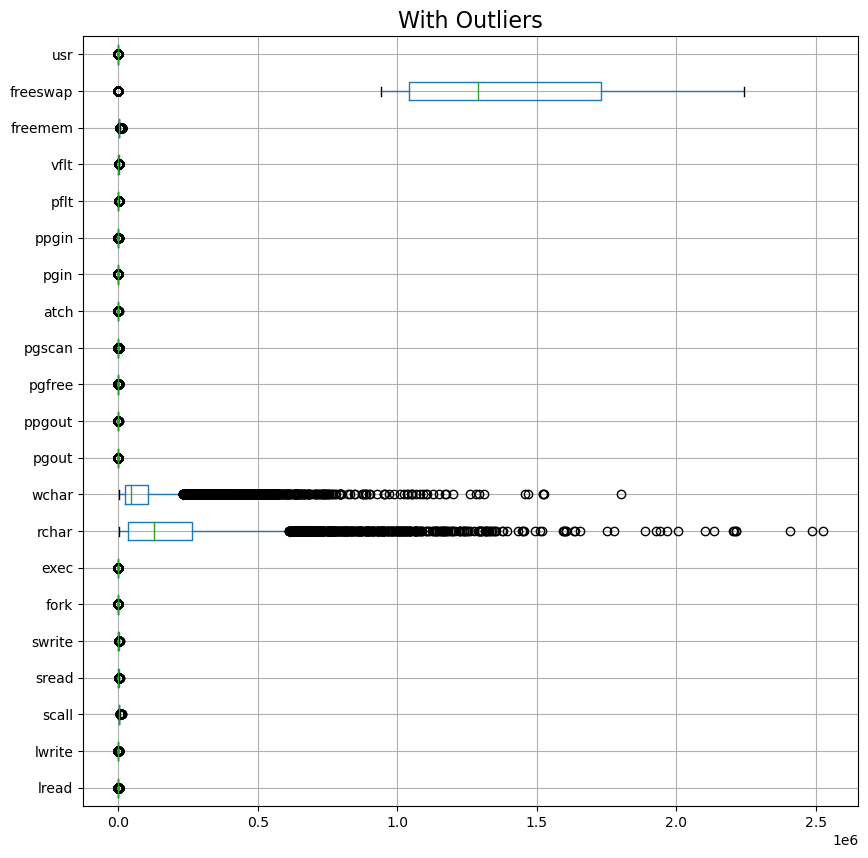

In [21]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

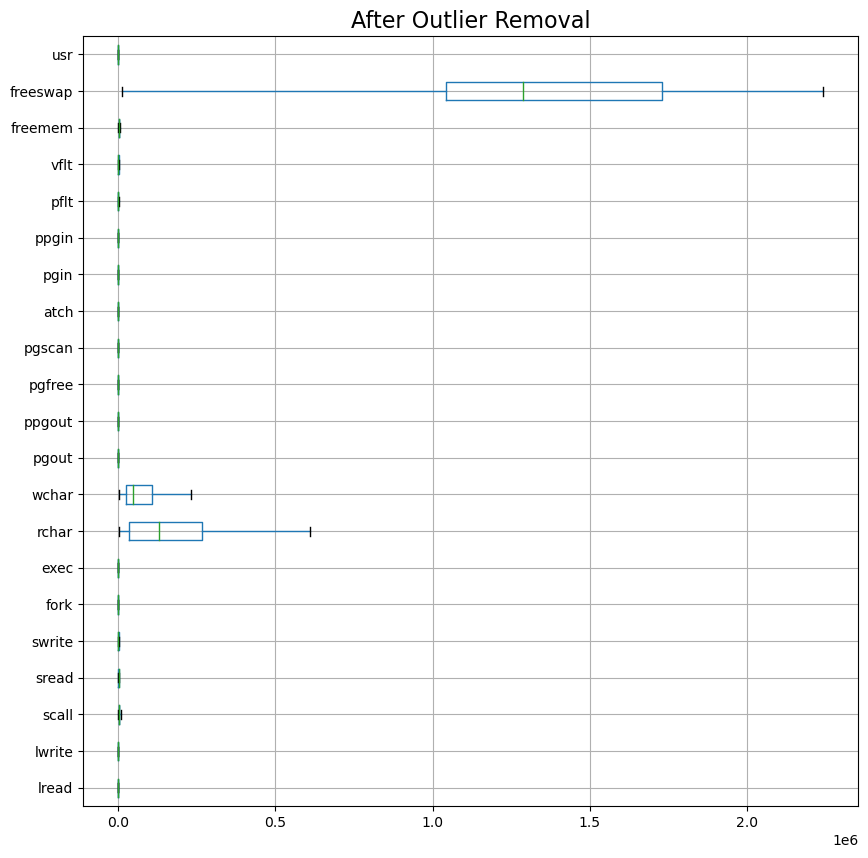

In [24]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

###### removing pgscan from dataframe

In [25]:
num_zeros = (df['pgscan'] == 0).sum()

# Count total number of values
total_values = df['pgscan'].count()

# Display results
print(f'Number of zeros: {num_zeros}')
print(f'Total number of values: {total_values}')

Number of zeros: 8192
Total number of values: 8192


In [26]:
df=df.drop(["pgscan"], axis=1)

### Train-Test Split

In [27]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.000000,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,95.0,0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.000000,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,97.0,1
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,197385.728363,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,87.0,1
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,197385.728363,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,98.0,1
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,197385.728363,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,90.0,1


In [28]:
# Copy all the predictor variables into X dataframe
X = df.drop(['usr'], axis=1)

# Copy target into the y dataframe. 
y = df[['usr']]

In [29]:
X.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.000000,53995.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.000000,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,1
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,197385.728363,31950.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,1
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,197385.728363,8670.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,1
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,197385.728363,12185.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,1


In [30]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### Linear Regression using statsmodel(OLS)

In [31]:
import statsmodels.api as sm

In [32]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [33]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:24   Log-Likelihood:                -16656.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5713   BIC:                         3.349e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1314 

#### Interpretation of R-squared
###### R-squared value can shows 79.6% of the variance in the training set.

In [34]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.239441
lread                    5.350218
lwrite                   4.328116
scall                    2.960756
sread                    6.415575
swrite                   5.594100
fork                    13.035282
exec                     3.241124
rchar                    2.129470
wchar                    1.583532
pgout                   11.359771
ppgout                  29.404123
pgfree                  16.497072
atch                     1.876238
pgin                    13.809962
ppgin                   13.951564
pflt                    12.001532
vflt                    15.968862
freemem                  1.961657
freeswap                 1.841358
runqsz_Not_CPU_Bound     1.157096
dtype: float64



#### <i>AS few predictors have VIF values > 3 therefore there is some multicolinearity in the data </i>

<font color='red'><i>We remove those predictors with multicolinarity due to which there is least impact on the adjusted R2 </i></font>

In [35]:
X_train.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [36]:
#1) Removing predictor 'ppgout' as VIF>3
X_train2 = X_train.drop(["ppgout"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [37]:
0.796-0.795

0.0010000000000000009

On dropping 'ppgout', adj. R-squared remains the same.

In [38]:
X_train = X_train.drop(["ppgout"], axis=1)

There is no effect on adj. R-squared after dropping the 'ppgout' column, and it has highest number in value of varience influence factor, so we remove it from the training set.

In [39]:
olsmod_2 = sm.OLS(y_train, X_train)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:25   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1580 

Let's check if multicollinearity is still present in the data.

In [40]:
# let's check the VIF of the predictors after removing'beds'
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.032870
lread                    5.350047
lwrite                   4.328043
scall                    2.960539
sread                    6.415504
swrite                   5.594015
fork                    13.027207
exec                     3.238925
rchar                    2.129451
wchar                    1.579945
pgout                    6.454277
pgfree                   6.172906
atch                     1.875900
pgin                    13.784432
ppgin                   13.898089
pflt                    12.001532
vflt                    15.964611
freemem                  1.959604
freeswap                 1.838299
runqsz_Not_CPU_Bound     1.156712
dtype: float64



In [41]:
# Removing predictor 'vflt' as VIF>3
X_train3 = X_train.drop(["vflt"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [42]:
# Removing predictor 'ppgin' as VIF>3
X_train4 = X_train.drop(["ppgin"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [43]:
# Removing predictor 'pgin' as VIF>3
X_train5 = X_train.drop(["pgin"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [44]:
# Removing predictor 'fork' as VIF>3
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [45]:
# Removing predictor 'pflt' as VIF>3
X_train7 = X_train.drop(["pflt"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.786 
Adjusted R-squared: 0.785


.

In [46]:
X_train = X_train.drop(["vflt"], axis=1)

In [47]:
olsmod_7 = sm.OLS(y_train, X_train)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1236.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:25   Log-Likelihood:                -16664.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5715   BIC:                         3.349e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0194 

In [48]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   28.653594
lread                    5.335051
lwrite                   4.326838
scall                    2.953114
sread                    6.369489
swrite                   5.592704
fork                    10.089022
exec                     3.235111
rchar                    2.119944
wchar                    1.558137
pgout                    6.451027
pgfree                   6.149320
atch                     1.864582
pgin                    13.602664
ppgin                   13.898088
pflt                     9.132270
freemem                  1.958294
freeswap                 1.787867
runqsz_Not_CPU_Bound     1.156656
dtype: float64



In [49]:
# Removing predictor 'ppgin' as VIF>3
X_train8 = X_train.drop(["ppgin"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [50]:
# Removing predictor 'pgin' as VIF>3
X_train9 = X_train.drop(["pgin"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train9)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [51]:
# Removing predictor 'fork' as VIF>3
X_train10 = X_train.drop(["fork"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [52]:
# Removing predictor 'pflt' as VIF>3
X_train11 = X_train.drop(["pflt"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [53]:
X_train = X_train.drop(["pgin"], axis=1)

In [54]:
olsmod_12 = sm.OLS(y_train, X_train)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1309.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:25   Log-Likelihood:                -16664.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5716   BIC:                         3.348e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0280 

In [55]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   28.410200
lread                    5.333501
lwrite                   4.326825
scall                    2.950524
sread                    6.369365
swrite                   5.592405
fork                    10.083691
exec                     3.231733
rchar                    2.110474
wchar                    1.557949
pgout                    6.443246
pgfree                   6.137213
atch                     1.864224
ppgin                    1.561741
pflt                     9.131499
freemem                  1.958283
freeswap                 1.774751
runqsz_Not_CPU_Bound     1.156581
dtype: float64



In [56]:
# Removing predictor 'fork' as VIF>3
X_train12 = X_train.drop(["fork"], axis=1)
olsmod_13 = sm.OLS(y_train, X_train12)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [57]:
# Removing predictor 'pflt' as VIF>3
X_train13 = X_train.drop(["pflt"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train13)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)

R-squared: 0.779 
Adjusted R-squared: 0.778


In [58]:
# Removing predictor 'pgout' as VIF>3
X_train14 = X_train.drop(["pgout"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train14)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.794


In [59]:
# Removing predictor 'sread' as VIF>3
X_train15 = X_train.drop(["sread"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train15)
olsres_16 = olsmod_16.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [60]:
# Removing predictor 'pgfree' as VIF>3
X_train16 = X_train.drop(["pgfree"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train16)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [61]:
X_train = X_train.drop(["sread"], axis=1)

In [62]:
olsmod_18 = sm.OLS(y_train, X_train)
olsres_18 = olsmod_18.fit()
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1391.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:25   Log-Likelihood:                -16664.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5717   BIC:                         3.348e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0281 

In [63]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   28.344343
lread                    5.326476
lwrite                   4.317943
scall                    2.695427
swrite                   3.200647
fork                    10.081940
exec                     3.226115
rchar                    1.694260
wchar                    1.544618
pgout                    6.442610
pgfree                   6.136419
atch                     1.862870
ppgin                    1.560739
pflt                     9.099331
freemem                  1.957713
freeswap                 1.761497
runqsz_Not_CPU_Bound     1.156577
dtype: float64



In [64]:
# Removing predictor 'fork' as VIF>3
X_train17 = X_train.drop(["fork"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train17)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [65]:
# Removing predictor 'pflt' as VIF>3
X_train18 = X_train.drop(["pflt"], axis=1)
olsmod_20 = sm.OLS(y_train, X_train18)
olsres_20 = olsmod_20.fit()
print(
    "R-squared:",
    np.round(olsres_20.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_20.rsquared_adj, 3),
)

R-squared: 0.779 
Adjusted R-squared: 0.778


In [66]:
# Removing predictor 'pgout' as VIF>3
X_train19 = X_train.drop(["pgout"], axis=1)
olsmod_21 = sm.OLS(y_train, X_train19)
olsres_21 = olsmod_21.fit()
print(
    "R-squared:",
    np.round(olsres_21.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_21.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.794


In [67]:
# Removing predictor 'pgfree' as VIF>3
X_train20 = X_train.drop(["pgfree"], axis=1)
olsmod_22 = sm.OLS(y_train, X_train20)
olsres_22 = olsmod_22.fit()
print(
    "R-squared:",
    np.round(olsres_22.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_22.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [68]:
# Removing predictor 'lread' as VIF>3
X_train21 = X_train.drop(["lread"], axis=1)
olsmod_23 = sm.OLS(y_train, X_train21)
olsres_23 = olsmod_23.fit()
print(
    "R-squared:",
    np.round(olsres_23.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_23.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [69]:
X_train = X_train.drop(["pgfree"], axis=1)

In [70]:
olsmod_24 = sm.OLS(y_train, X_train)
olsres_24 = olsmod_24.fit()
print(olsres_24.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:25   Log-Likelihood:                -16665.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5718   BIC:                         3.347e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0288 

In [71]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   28.344272
lread                    5.323527
lwrite                   4.313796
scall                    2.692551
swrite                   3.199549
fork                    10.080442
exec                     3.224075
rchar                    1.694116
wchar                    1.544262
pgout                    2.045544
atch                     1.861715
ppgin                    1.521269
pflt                     9.098348
freemem                  1.946652
freeswap                 1.760177
runqsz_Not_CPU_Bound     1.156294
dtype: float64



In [72]:
# Removing predictor 'fork' as VIF>3
X_train22 = X_train.drop(["fork"], axis=1)
olsmod_25 = sm.OLS(y_train, X_train22)
olsres_25 = olsmod_25.fit()
print(
    "R-squared:",
    np.round(olsres_25.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_25.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [73]:
# Removing predictor 'pflt' as VIF>3
X_train23 = X_train.drop(["pflt"], axis=1)
olsmod_26 = sm.OLS(y_train, X_train23)
olsres_26 = olsmod_26.fit()
print(
    "R-squared:",
    np.round(olsres_26.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_26.rsquared_adj, 3),
)

R-squared: 0.779 
Adjusted R-squared: 0.778


In [74]:
# Removing predictor 'lread' as VIF>3
X_train24 = X_train.drop(["lread"], axis=1)
olsmod_27 = sm.OLS(y_train, X_train24)
olsres_27 = olsmod_27.fit()
print(
    "R-squared:",
    np.round(olsres_27.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_27.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [75]:
# Removing predictor 'lwrite' as VIF>3
X_train25 = X_train.drop(["lwrite"], axis=1)
olsmod_28 = sm.OLS(y_train, X_train25)
olsres_28 = olsmod_28.fit()
print(
    "R-squared:",
    np.round(olsres_28.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_28.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [76]:
X_train = X_train.drop(["fork"], axis=1)

In [77]:
olsmod_29 = sm.OLS(y_train, X_train)
olsres_29 = olsmod_29.fit()
print(olsres_29.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1588.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:25   Log-Likelihood:                -16667.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5719   BIC:                         3.346e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0695 

In [78]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   28.189361
lread                    5.302375
lwrite                   4.293786
scall                    2.652701
swrite                   3.011748
exec                     2.842654
rchar                    1.693341
wchar                    1.536417
pgout                    2.045336
atch                     1.860755
ppgin                    1.517771
pflt                     3.441188
freemem                  1.946202
freeswap                 1.757490
runqsz_Not_CPU_Bound     1.155736
dtype: float64



In [79]:
# Removing predictor 'lread' as VIF>3
X_train26 = X_train.drop(["lread"], axis=1)
olsmod_30 = sm.OLS(y_train, X_train26)
olsres_30 = olsmod_30.fit()
print(
    "R-squared:",
    np.round(olsres_30.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_30.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.793


In [80]:
# Removing predictor 'lwrite' as VIF>3
X_train27 = X_train.drop(["lwrite"], axis=1)
olsmod_31 = sm.OLS(y_train, X_train27)
olsres_31 = olsmod_31.fit()
print(
    "R-squared:",
    np.round(olsres_31.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_31.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.794


In [81]:
# Removing predictor 'pflt' as VIF>3
X_train28 = X_train.drop(["pflt"], axis=1)
olsmod_32 = sm.OLS(y_train, X_train28)
olsres_32 = olsmod_32.fit()
print(
    "R-squared:",
    np.round(olsres_32.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_32.rsquared_adj, 3),
)

R-squared: 0.745 
Adjusted R-squared: 0.745


In [82]:
X_train = X_train.drop(["lwrite"], axis=1)

In [83]:
olsmod_33 = sm.OLS(y_train, X_train)
olsres_33 = olsmod_33.fit()
print(olsres_33.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1705.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:26   Log-Likelihood:                -16674.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5720   BIC:                         3.347e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1255 

In [84]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   28.126584
lread                    1.299547
scall                    2.649527
swrite                   3.011475
exec                     2.830001
rchar                    1.693289
wchar                    1.528188
pgout                    2.044824
atch                     1.860492
ppgin                    1.483896
pflt                     3.303403
freemem                  1.945140
freeswap                 1.757471
runqsz_Not_CPU_Bound     1.149189
dtype: float64



In [85]:
# Removing predictor 'pflt' as VIF>3
X_train29 = X_train.drop(["pflt"], axis=1)
olsmod_34 = sm.OLS(y_train, X_train29)
olsres_34 = olsmod_34.fit()
print(
    "R-squared:",
    np.round(olsres_34.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_34.rsquared_adj, 3),
)

R-squared: 0.741 
Adjusted R-squared: 0.74


In [86]:
# Removing predictor 'swrite' as VIF>3
X_train30 = X_train.drop(["swrite"], axis=1)
olsmod_35 = sm.OLS(y_train, X_train30)
olsres_35 = olsmod_35.fit()
print(
    "R-squared:",
    np.round(olsres_35.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_35.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [87]:
X_train = X_train.drop(["swrite"], axis=1)

In [88]:
olsmod_36 = sm.OLS(y_train, X_train)
olsres_36 = olsmod_36.fit()
print(olsres_36.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1835.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:26   Log-Likelihood:                -16690.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5721   BIC:                         3.349e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.8573 

In [89]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   27.444949
lread                    1.299323
scall                    1.736362
exec                     2.562518
rchar                    1.692081
wchar                    1.408728
pgout                    2.044806
atch                     1.859928
ppgin                    1.483532
pflt                     2.778197
freemem                  1.924179
freeswap                 1.750119
runqsz_Not_CPU_Bound     1.149187
dtype: float64



**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply . This shows that these variables did not have much predictive power.**

### Testing the Assumptions of Linear Regression 

##### For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

#### Linearity and Independence of predictors 

In [90]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_36.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_36.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,91.0,91.353579,-0.353579
1,94.0,91.736987,2.263013
2,61.5,74.662706,-13.162706
3,83.0,80.659585,2.340415
4,94.0,97.764015,-3.764015


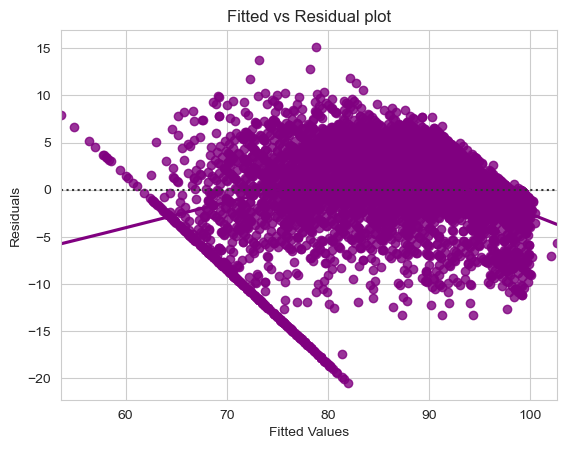

In [91]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Test for Normality 

In [92]:
from scipy import stats
stats.shapiro(df_pred["Residuals"])

C:\ANACONDA\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9451327919960022, pvalue=7.862685683326549e-42)

##### * Since p-value < 0.05, the residuals are not normal as per shapiro test.

#### Test for Homoscedasticity

In [93]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train)[1]

0.0017459395679956555

##### Since p-value < 0.05 we can say that the residuals are not homoscedastic.

### Linear regression equation.

In [94]:
olsres_36.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1835.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:58:30   Log-Likelihood:                -16690.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5721   BIC:                         3.349e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.8573      0.308    272.402      0.000      83.254      84.461
lread                   -0.0367      0.004     -8.252      0.000      -0.045      -0.028
scall                   -0.0009   4.84e-05    -17.948      0.000      -0.001      -0.001
exec                    -0.2882      0.046     -6.247      0.000      -0.379      -0.198
rchar                -5.429e-06   4.37e-07    -12.436      0.000   -6.28e-06   -4.57e-06
wchar                 -6.11e-06   9.79e-07     -6.243      0.000   -8.03e-06   -4.19e-06
pgout                   -0.3457      0.038     -9.008      0.000      -0.421      -0.270
atch                     0.6211      0.143      4.345      0.000       0.341       0.901
ppgin                   -0.0651      0.006    -10.074      0.000      -0.078      -0.052
pflt                    -0.0429      0.001    -44.743      0.000      -0.045      -0.041
freemem                 -0.0004   5.05e-05     -8.660      0.000      -0.001      -0.000
freeswap              9.001e-06   1.86e-07     48.339      0.000    8.64e-06    9.37e-06
runqsz_Not_CPU_Bound     1.6356      0.126     12.959      0.000       1.388       1.883
==============================================================================
Omnibus:                      999.129   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2053.646
Skew:                          -1.039   Prob(JB):                         0.00
Kurtosis:                       5.068   Cond. No.                     7.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The model equation will be as follows:

In [95]:
# Let us write the equation of linear regression
Equation = "log_price ="
print(Equation, end=" ")
for i in range(len(X_train30.columns)):
    if i == 0:
        print(olsres_36.params[i], "+", end=" ")
    elif i != len(X_train5.columns) - 1:
        print(
            olsres_36.params[i],
            "* (",
            X_train30.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_36.params[i], "* (", X_train30.columns[i], ")")

log_price = 83.85732586544668 + -0.036690269583115435 * ( lread ) +  -0.0008678489465544963 * ( scall ) +  -0.2882180586865333 * ( exec ) +  -5.428931310443116e-06 * ( rchar ) +  -6.110130803347406e-06 * ( wchar ) +  -0.3456626619874853 * ( pgout ) +  0.6210731289413629 * ( atch ) +  -0.06509379773683682 * ( ppgin ) +  -0.04287084853575193 * ( pflt ) +  -0.0004372778354186676 * ( freemem ) +  9.000993477470678e-06 * ( freeswap ) +  1.6355878445677583 * ( runqsz_Not_CPU_Bound ) +  

### Predictions 

In [96]:
X_train30.columns

Index(['const', 'lread', 'scall', 'exec', 'rchar', 'wchar', 'pgout', 'atch',
       'ppgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [97]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [98]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ['lwrite','sread','swrite','fork','ppgout','pgfree','pgin','vflt'], axis=1
)

In [99]:
# let's make predictions on the test set
y_pred_test = olsres_36.predict(X_test2)
y_pred_train = olsres_36.predict(X_train30)

In [100]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [101]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

4.444627728718755

In [102]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

4.679260750533668

### Linear Regression using (sklearn)

In [103]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train30, y_train)

LinearRegression()

In [104]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train30.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for lread is -0.03669026958298998
The coefficient for scall is -0.0008678489465565487
The coefficient for exec is -0.2882180586864487
The coefficient for rchar is -5.428931310498666e-06
The coefficient for wchar is -6.110130803332021e-06
The coefficient for pgout is -0.34566266198778445
The coefficient for atch is 0.62107312894077
The coefficient for ppgin is -0.06509379773680948
The coefficient for pflt is -0.04287084853574542
The coefficient for freemem is -0.00043727783541954135
The coefficient for freeswap is 9.00099347748728e-06
The coefficient for runqsz_Not_CPU_Bound is 1.635587844567757


In [105]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 83.85732586545495


In [106]:
# R square on training data
regression_model.score(X_train30, y_train)

0.7937868771807132

79.3% of the variation in the log_price is explained by the predictors in the model for train set

In [107]:
# R square on testing data
regression_model.score(X_test2, y_test)

0.7650315705954154

In [108]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train30, y_train).predict(X_train30)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.444627728718756

In [109]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train30, y_train).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.679260750533353